<a href="https://colab.research.google.com/github/Priyabrat845/Machine-Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##      **Decision Tree**

The file daily_weather.csv is a comma-separated file that contains weather data. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

**Problem:** **Use morning sensor signals as features to predict whether the humidity will be high at 3pm.**

In [1]:
#First we import the necessary libraries of the python for demostration of the Decision Tree Classifier.
import pandas as pd
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Loading the data
data=pd.read_csv('/content/drive/MyDrive/Rough works/daily_weather.csv')
data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [3]:
data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'high_humidity_3pm'],
      dtype='object')

In [4]:
data.shape

(1095, 10)

In [5]:
data.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
count,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,0.499543
std,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,0.500228
min,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,0.000000
25%,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,0.000000
50%,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,0.000000
75%,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,1.000000
max,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,1.000000


In [6]:
data['high_humidity_3pm'].value_counts()

0    548
1    547
Name: high_humidity_3pm, dtype: int64

In [7]:
#Removing the rows which contains the null values
data.dropna(inplace=True)

In [8]:
data.shape

(1064, 10)

In [14]:
dependent_variable = 'high_humidity_3pm'
dependent_variable

'high_humidity_3pm'

In [20]:
independent_variables = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

In [23]:
X = data[independent_variables]
y = data[dependent_variable]

In [25]:
#By using train_test_split we have split the data into traing dataset and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=324)

In [26]:
#Fitting on Train Set.
humidity_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [30]:
#Predict on Train Set
train_predicted = humidity_classifier.predict(X_train)
train_predicted[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [31]:
y_train[:10]

434     1
26      1
1018    1
410     1
172     0
147     1
371     1
175     1
129     0
296     1
Name: high_humidity_3pm, dtype: int64

In [28]:
#Predict on Test Set
y_predicted = humidity_classifier.predict(X_test)
y_predicted[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [29]:
y_test[:10]

456     0
845     0
693     1
259     1
723     1
224     1
300     1
442     0
585     1
1057    1
Name: high_humidity_3pm, dtype: int64

## **Measure Accuracy of the Classifier**

In [32]:
#Accuracy of train set.
accuracy_score(y_train, train_predicted) * 100

90.0117508813161

In [33]:
#Accuracy of test set.
accuracy_score(y_test, y_predicted) * 100

88.73239436619718

## **Visulaizing Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

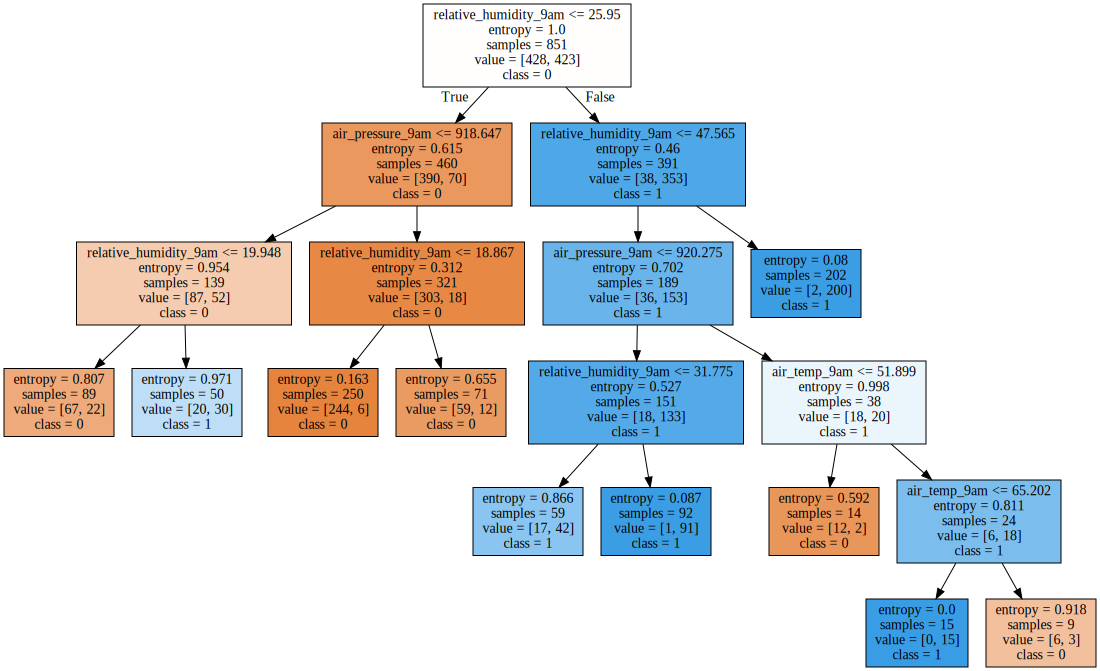

In [35]:
graph = Source(tree.export_graphviz(humidity_classifier, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## **Conclusion**

As the accuracy of the train set and test set are too close so the model prediction can be accepted.